In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Show max columns so we can see everything

In [2]:
#set columns
pd.get_option("display.max_columns") #this will display what the current setting is
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

let's read our cleaned data file

In [2]:
# read data file
df = pd.read_csv('./housing.csv', index_col= 0)

# Map of Ames (Sales Price)
- heat map by Sale Price using the coordinates from Google Map

In [4]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# import street map
street_map = gpd.read_file('./geoshape/border_level8_polygon.shp')

In [25]:
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

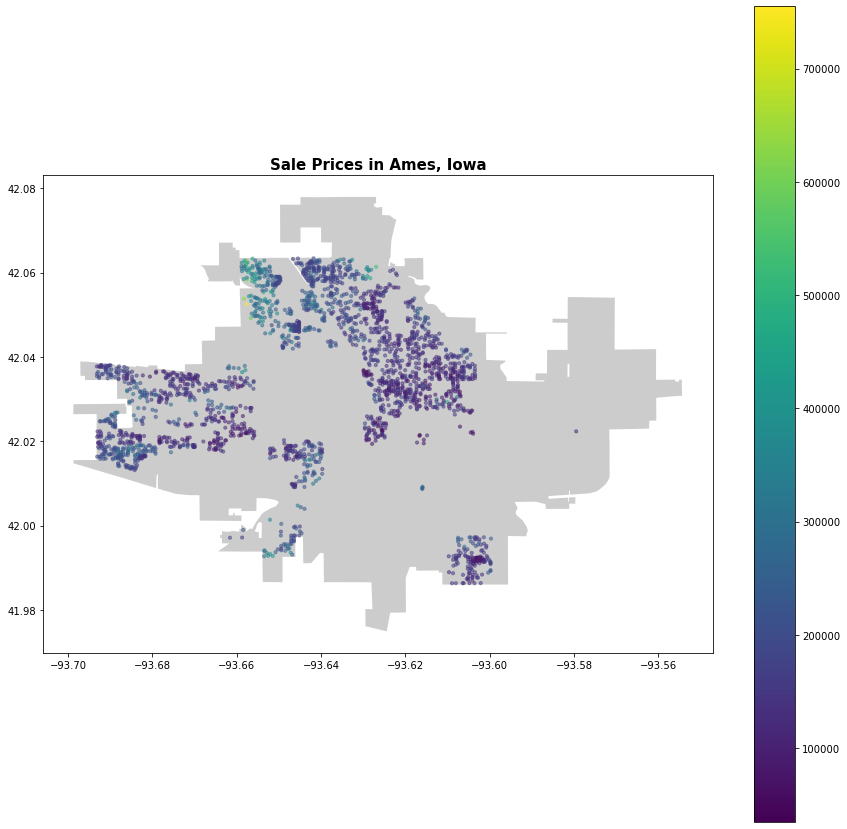

In [47]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='SalePrice',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Sale Prices in Ames, Iowa', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# show map
plt.show()

# General EDA
- do some basic charts to prep for regression

In [38]:
# setting dependent variable
Y = df[['SalePrice']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E91FDDC8E0>]],
      dtype=object)

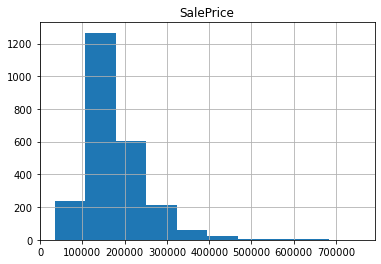

In [41]:
Y.hist() #right-skewed.. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E91FE754C0>]],
      dtype=object)

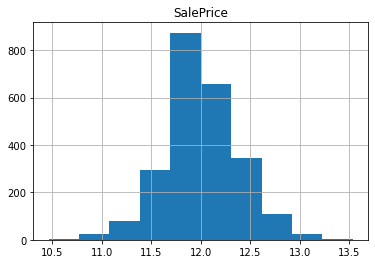

In [45]:
# try log transformation
Y_log = np.log(Y)

Y_log.hist() #better

Let's check all non-categorical columnms, create a subset and check their histograms

In [54]:
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Coordinates,Lat,Lon,geometry
0,909176150,856,126000,30,RL,68.217524,7890,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,Normal,"436 Hayward Ave, Ames, IA 50014, USA",42.017780,-93.651452,POINT (-93.65145 42.01778)
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,No_Pool,No_Fence,No_Misc,0,2,2009,WD,Normal,"3416 West St, Ames, IA 50014, USA",42.024697,-93.664186,POINT (-93.66419 42.02470)
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,No_Pool,No_Fence,No_Misc,0,11,2007,WD,Normal,"320 S 2nd St, Ames, IA 50010, USA",42.021389,-93.614855,POINT (-93.61485 42.02139)
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No_Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal,"1524 Douglas Ave, Ames, IA 50010, USA",42.038070,-93.612065,POINT (-93.61206 42.03807)
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,No_Fireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,No_Pool,No_Fence,No_Misc,0,11,2009,WD,Normal,"2304 Fillmore Ave, Ames, IA 50010, USA",42.044900,-93.631893,POINT (-93.63189 42.04490)


In [53]:
df.dtypes

PID                 int64
GrLivArea           int64
SalePrice           int64
MSSubClass          int64
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
Alley              object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
BsmtQual           object
BsmtCond           object
BsmtExposure       object
BsmtFinType1       object
BsmtFinSF1        float64
BsmtFinType2       object
BsmtFinSF2  

In [56]:
df_num = df[['GrLivArea','SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual',
             'OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
             '1stFlrSF','2ndFlrSF','LowQualFinSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
             'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
             'PoolArea','MiscVal','MoSold','YrSold']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E922C82C70>,
      dtype=object)

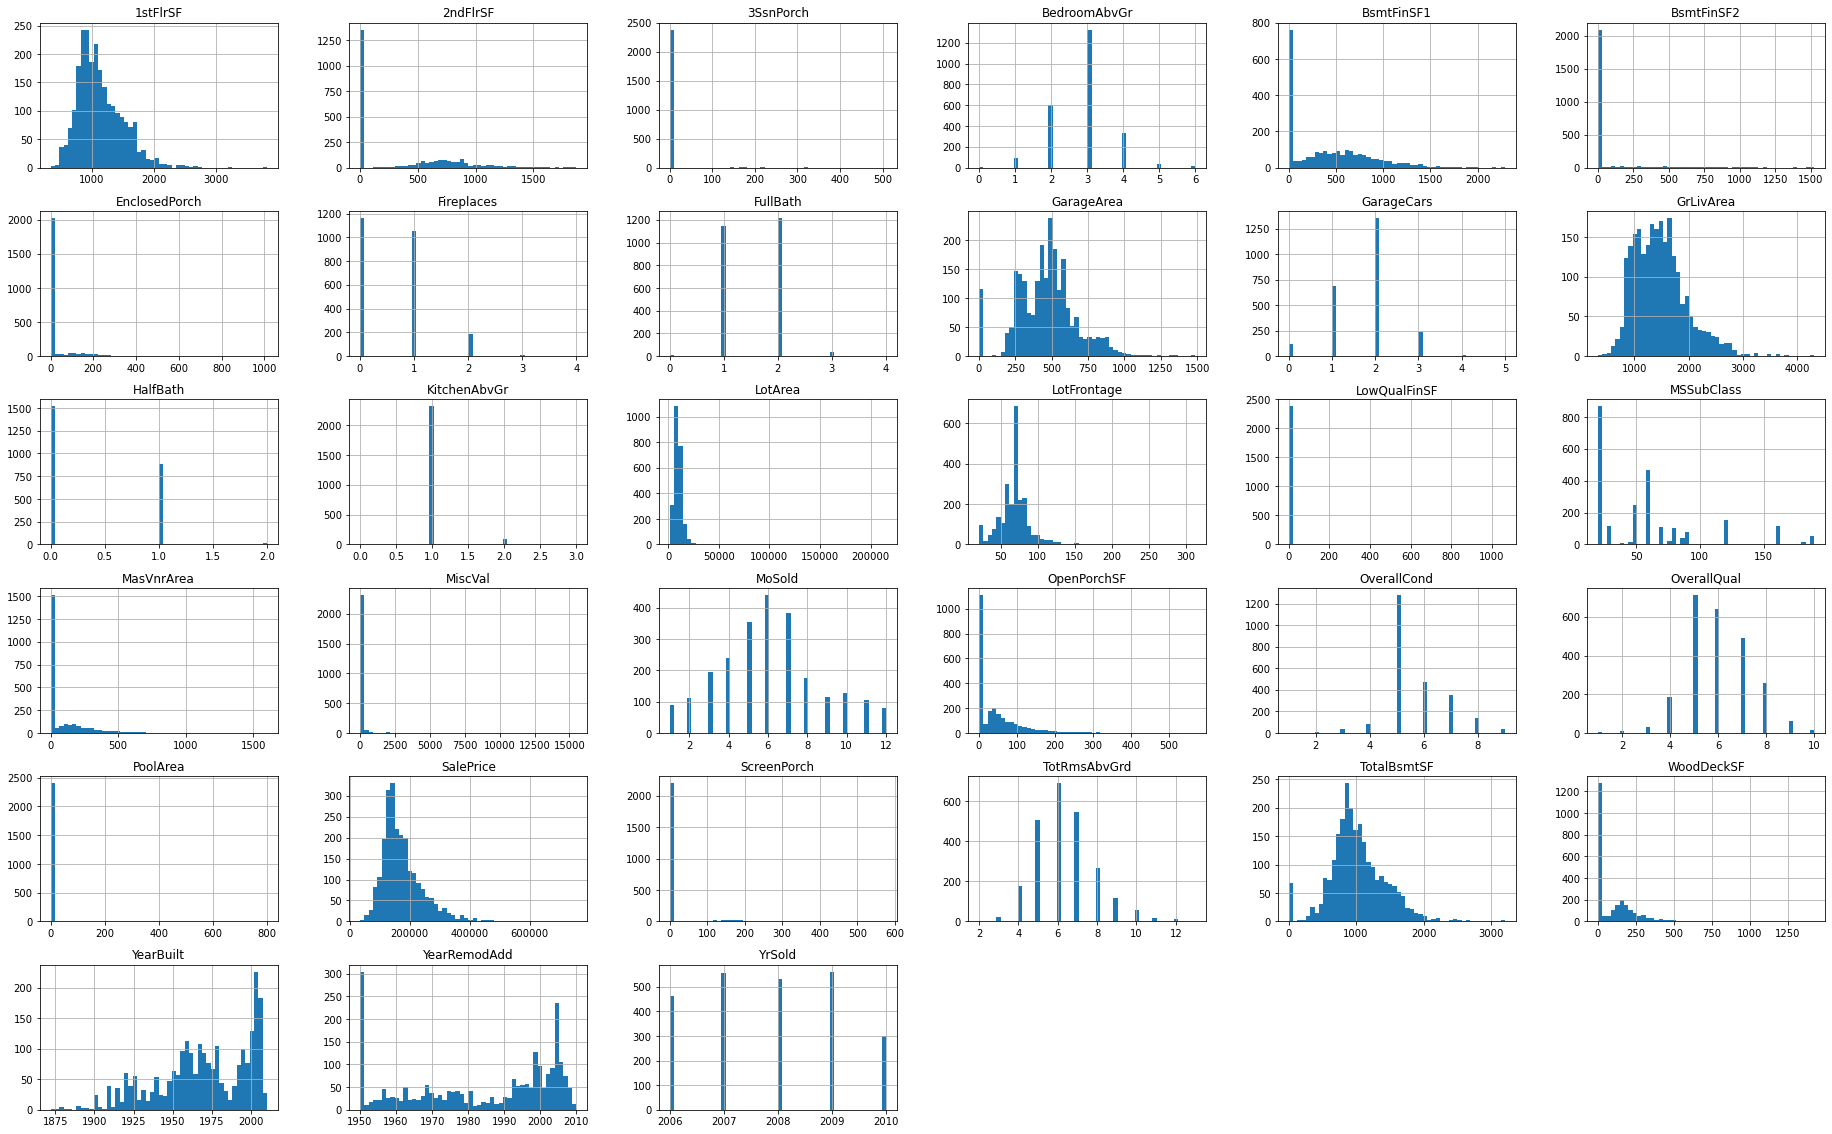

In [60]:
df_num.hist(figsize=(32,20), bins=50)

# Let's explore charts with mean of SalePrice
- see some coorelations

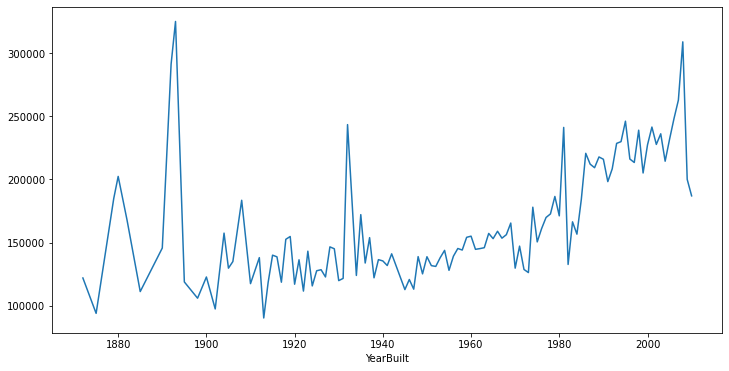

In [94]:
# average sale price by Year Built
df.groupby(['YearBuilt'])['SalePrice'].agg('mean').plot(figsize=(12,6))

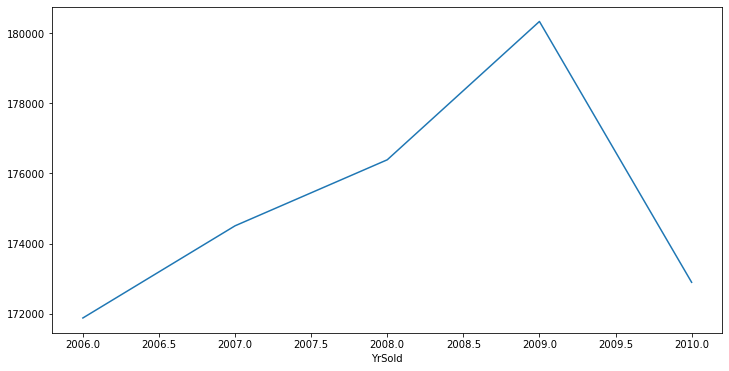

In [99]:
#2008 financial collapse seems to have had big impact which makes sense
df.groupby(['YrSold'])['SalePrice'].agg('mean').plot(figsize=(12,6))

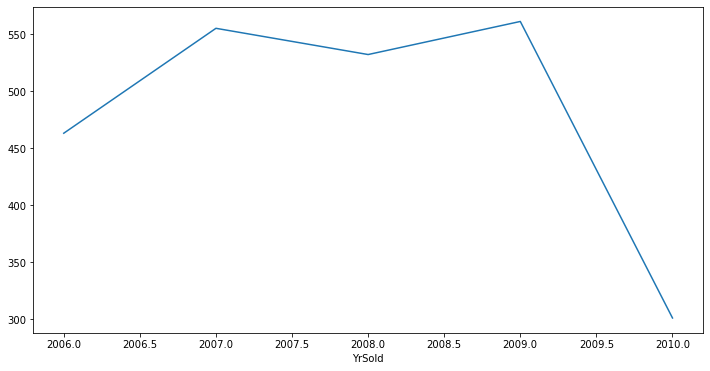

In [100]:
# the number of sales went down as well.  Meaningful since data is up to 2010 only
df.groupby(['YrSold'])['SalePrice'].agg('count').plot(figsize=(12,6))

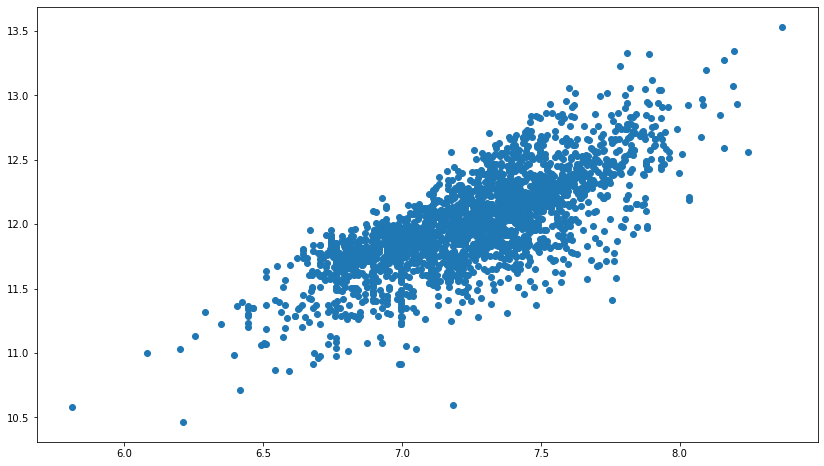

In [114]:
#This is with using log of each of these variables much better
# try a simple linear regression on this one

plt.rcParams["figure.figsize"] = (14,8)
plt.scatter(np.log(df.GrLivArea),np.log(Y))

In [112]:
from sklearn.linear_model import LinearRegression, HuberRegressor

In [122]:
ols = LinearRegression()
ols.fit(np.log(Y),np.log(df.GrLivArea))

print('intercept %.2f' %(ols.intercept_))
print('slope %.2f' %(ols.coef_))
print('r-squared %.2f' %(ols.score(np.log(Y),np.log(df.GrLivArea))))

intercept -0.47
slope 0.64
r-squared 0.55


# Correlation Matrix for different groups
- within groups
- single category in one particular group to other groups

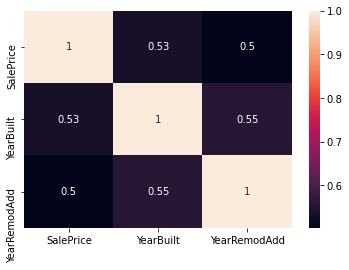

In [88]:
#garage
df_year = df[['SalePrice','YearBuilt','YearRemodAdd']]

corrMatrix = df_year.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

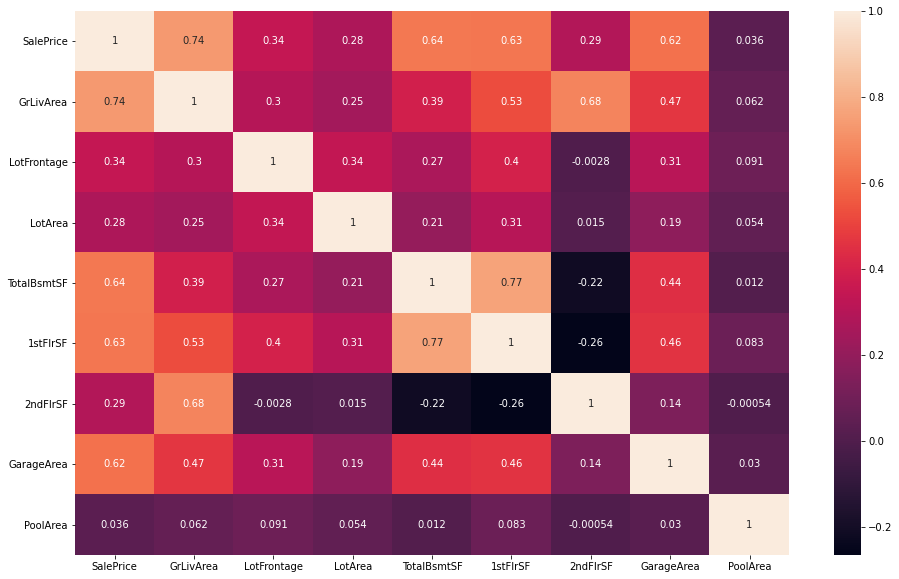

In [92]:
#area
df_area = df[['SalePrice','GrLivArea','LotFrontage','LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'PoolArea' ]]

plt.figure(figsize=(16,10))
corrMatrix = df_area.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

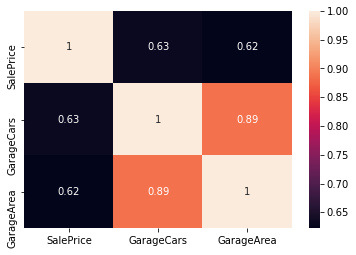

In [86]:
#garage
df_garage = df[['SalePrice','GarageCars','GarageYrBlt','GarageArea']]

corrMatrix = df_garage.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Creating Histograms for Categorical Features
- create for loop
- run to find heavily weighted names

In [3]:
# create copy so we can work backwards and delete non-categorical features
df1 = df

In [4]:
df1.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Coordinates,Lat,Lon
0,909176150,856,126000,30,RL,68.217524,7890,Pave,No_alley,Reg,...,No_Fence,No_Misc,0,3,2010,WD,Normal,"436 Hayward Ave, Ames, IA 50014, USA",42.017780,-93.651452
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_alley,Reg,...,No_Fence,No_Misc,0,2,2009,WD,Normal,"3416 West St, Ames, IA 50014, USA",42.024697,-93.664186
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_alley,Reg,...,No_Fence,No_Misc,0,11,2007,WD,Normal,"320 S 2nd St, Ames, IA 50010, USA",42.021389,-93.614855
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_alley,Reg,...,No_Fence,No_Misc,0,5,2009,WD,Normal,"1524 Douglas Ave, Ames, IA 50010, USA",42.038070,-93.612065
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_alley,Reg,...,No_Fence,No_Misc,0,11,2009,WD,Normal,"2304 Fillmore Ave, Ames, IA 50010, USA",42.044900,-93.631893


In [59]:
for column in df1:
        print(df1[column].value_counts())

RL         1890
RM          394
FV           92
RH           20
C (all)      13
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64
Pave    2403
Grvl       9
Name: Street, dtype: int64
No_alley    2258
Grvl         100
Pave          54
Name: Alley, dtype: int64
Reg    1532
IR1     803
IR2      65
IR3      12
Name: LotShape, dtype: int64
Lvl    2184
Bnk      91
HLS      86
Low      51
Name: LandContour, dtype: int64
AllPub    2410
NoSewr       2
Name: Utilities, dtype: int64
Inside     1764
Corner      411
CulDSac     151
FR2          74
FR3          12
Name: LotConfig, dtype: int64
Gtl    2295
Mod     106
Sev      11
Name: LandSlope, dtype: int64
Norm      2083
Feedr      130
Artery      77
PosN        35
RRAn        35
RRAe        23
PosA        18
RRNn         7
RRNe         4
Name: Condition1, dtype: int64
Norm      2390
Feedr       12
RRNn         2
Artery       2
PosA         2
PosN         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
1Fam      2001
Twnh

In [58]:
# to delete each column needed after checking the list
# del df1['BsmtUnfSF']

In [11]:
df.shape[0]

2412

In [8]:
df1['GrLivArea'].value_counts() / df.shape[0]

864     0.014511
1040    0.010365
1092    0.008706
1456    0.005804
816     0.005804
          ...   
2294    0.000415
2288    0.000415
2274    0.000415
2270    0.000415
2049    0.000415
Name: GrLivArea, Length: 1164, dtype: float64

In [62]:
# final list of names that could potentially be re-categorized
df1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'SaleType'],
      dtype='object')